In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
#dataframe is created

In [2]:
list1=df.City.unique()
for i in list1:
    df.loc[df['City']==i]=df.loc[df['City']==i].interpolate()
    

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,24.528,0.840,Xian,China,34.56N,108.97E


In [5]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,239177.000000,239177.000000
mean,18.172453,1.008866
std,9.951840,0.982111
min,-26.772000,0.040000
25%,12.866000,0.349000
50%,20.479000,0.631000
75%,25.909000,1.422000
max,38.283000,14.037000


In [6]:
print(df['City'].value_counts())

Paris               3239
Saint Petersburg    3239
New York            3239
Istanbul            3239
Rome                3239
                    ... 
Luanda              1893
Durban              1881
Cape Town           1881
Umm Durman          1857
Lima                1591
Name: City, Length: 100, dtype: int64


In [7]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
l=df['City'].value_counts()
l['Delhi']

2613

In [9]:
df[2:4]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [10]:
print(*df)

dt AverageTemperature AverageTemperatureUncertainty City Country Latitude Longitude


In [11]:
params=['dt','AverageTemperature','AverageTemperatureUncertainty','City','Latitude','Longitude']

In [12]:
df[params[5]]

0           3.23W
1           3.23W
2           3.23W
3           3.23W
4           3.23W
           ...   
239172    108.97E
239173    108.97E
239174    108.97E
239175    108.97E
239176    108.97E
Name: Longitude, Length: 239177, dtype: object

In [13]:
df[params[1]].notnull().value_counts()

True    239177
Name: AverageTemperature, dtype: int64

In [14]:
df[params[1]].isnull().value_counts()

False    239177
Name: AverageTemperature, dtype: int64

In [15]:
#len(df[params[1]])
len(df)
df['City'].index >8

array([False, False, False, ...,  True,  True,  True])

In [16]:
date=[]
avg=[]
for i in range(len(df)):
    if df[params[3]][i]=='Delhi':
        date.append(df[params[0]][i])
        avg.append(df[params[1]][i])

In [17]:
len(date)
type(date[0])

str

In [18]:
len(avg)

2613

In [19]:
'2013-09-01' in date

True

In [20]:
date.index('2001-01-01')

2460

In [21]:
date.index('2009-12-01')

2567

In [22]:
short=date[2460:2568]

In [23]:
avgshort=avg[2460:2568]

In [24]:
len(avgshort)

108

In [25]:
year=[]
k=2001
for i in range(12):
    year.append(k)
    k+=1
year

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

In [26]:
date.index('1960-01-01')

1968

In [27]:
fin=date[1968:2568]

In [28]:
len(fin)

600

In [29]:
avgtemp=avg[1968:2568]

In [30]:
avg_year=[]
for i in range(50):
    avg_year.append(0)

In [31]:
avg_year=[]
for i in range(50):
    avg_year.append(0)

i=0
j=0
k=12
while j<50:
    while i<k:
        avg_year[j]+=avgtemp[i]
        i+=1
    k+=12
    avg_year[j]/=12
    j+=1   

In [32]:
array=[0,0,0,0,0]
x=0
y=0
k=10
while y<5:
    while x<k:
        array[y]+=avg_year[x]
        x+=1
    array[y]/=10
    y+=1
    k+=10
array

[25.259916666666665,
 25.347516666666667,
 25.654116666666663,
 25.689533333333333,
 26.09635]

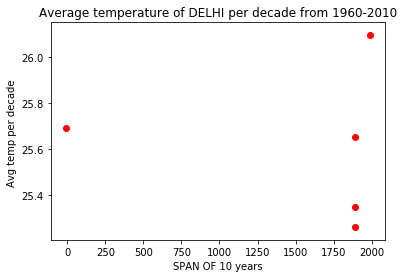

In [33]:
x=[1960-70,1970-80,1980-90,1990-2000,2000-10]
plt.scatter(x, array, color='r')   #single color for all points, points marker square
plt.xlabel('SPAN OF 10 years')
plt.ylabel('Avg temp per decade ')
plt.title('Average temperature of DELHI per decade from 1960-2010')
plt.show()

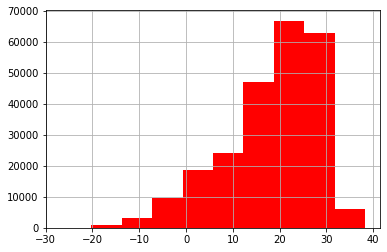

In [34]:
df[params[1]].hist(histtype='stepfilled', color='red')

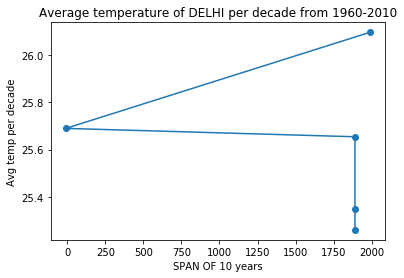

In [35]:
plt.plot(x,array,marker='o')
plt.xlabel('SPAN OF 10 years')
plt.ylabel('Avg temp per decade')
plt.title('Average temperature of DELHI per decade from 1960-2010')
plt.show()

In [36]:
dates=[]
avgs=[]
uncer=[]
for i in range(len(df)):
    if df[params[3]][i]=='Bangalore':
        dates.append(df[params[0]][i])
        avgs.append(df[params[1]][i])
        uncer.append(df[params[2]][i])
#avgs  

In [37]:
dates.index('1960-01-01')

1968

In [38]:
fins=dates[1968:2568]
#fins

In [39]:
average=avgs[1968:2568]

In [40]:
avgs_year=[]
for i in range(50):
    avgs_year.append(0)


In [41]:
i=0
j=0
k=12
while j<50:
    while i<k:
        avgs_year[j]+=average[i]
        i+=1
    k+=12
    avgs_year[j]/=12
    j+=1
#avgs_year

In [42]:
arrays=[0,0,0,0,0]
x=0
y=0
k=10
while y<5:
    while x<k:
        arrays[y]+=avgs_year[x]
        x+=1
    arrays[y]/=10
    y+=1
    k+=10

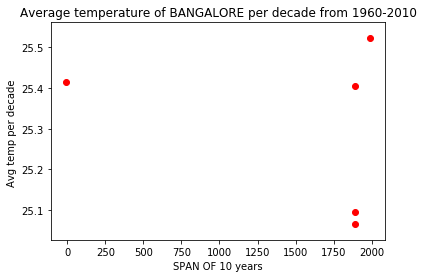

In [43]:
x=[1960-70,1970-80,1980-90,1990-2000,2000-10]
plt.scatter(x, arrays, color='r')   #single color for all points, points marker square
plt.xlabel('SPAN OF 10 years')
plt.ylabel('Avg temp per decade ')
plt.title('Average temperature of BANGALORE per decade from 1960-2010')
plt.show()

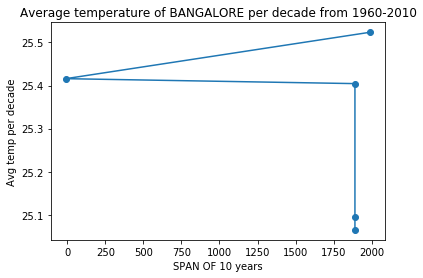

In [44]:
plt.plot(x,arrays,marker='o')
plt.xlabel('SPAN OF 10 years')
plt.ylabel('Avg temp per decade')
plt.title('Average temperature of BANGALORE per decade from 1960-2010')
plt.show()

In [45]:
key_val={}
for i in range(len(df)):
    if df[params[-1]][i] not in key_val and df[params[0]][i]=='2013-01-01':
        key_val[df[params[-1]][i]]=df[params[1]][i] 

In [46]:
avg_temp_array=avgs[1968:2568]

In [47]:
from random import sample
from statistics import mean

def plot(test_array, sample_size, num_samples):
    x = []
    for i in range(0, num_samples):
        #to find N samples from the arr
        smp = sample(test_array, sample_size)
        mu = mean(smp)
        x.append(mu)
    print(len(x))
    plt.title('illustration of Central Limit Theorem')
    plt.xlabel('mean of sample means')
    plt.ylabel('frequency of average temperatures')
    plt.hist(x)
    plt.show()
    #plt.title('distribution of mean of sample means')
    #population = average temp per month of bangalore from 1960-2010

300


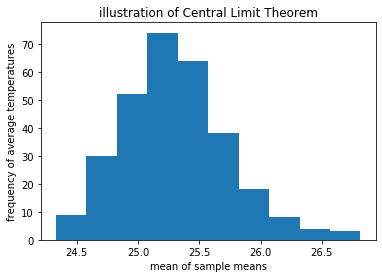

In [48]:
plot(avg_temp_array,20,300)

300


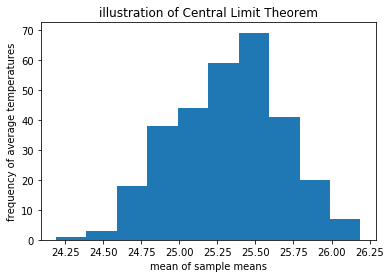

In [49]:
plot(avg_temp_array,25,300)

300


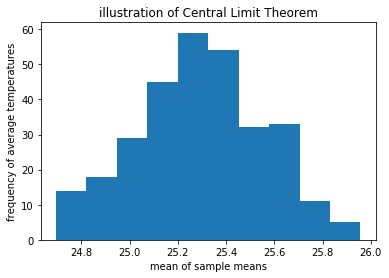

In [50]:
plot(avg_temp_array,40,300)

In [51]:
df.corr(method='pearson')

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.000000,-0.196338
AverageTemperatureUncertainty,-0.196338,1.000000


In [52]:
s=df.loc[df.Country=='India']

In [53]:
Indian_cities=[]
for i in range(len(df)):
           if df["Country"][i] =='India':
                if df['City'][i] not in Indian_cities:
                    Indian_cities.append(df['City'][i]) 

In [54]:
Indian_cities

['Ahmadabad',
 'Bangalore',
 'Bombay',
 'Calcutta',
 'Delhi',
 'Hyderabad',
 'Jaipur',
 'Kanpur',
 'Lakhnau',
 'Madras',
 'Nagpur',
 'New Delhi',
 'Pune',
 'Surat']

In [55]:
madras=df.loc[df['City']=='Madras']

In [56]:
madras=madras[-21:-9]

In [57]:
temp_madras=[]

In [58]:
for i in range(len(madras)):
    temp_madras.append(madras['AverageTemperature'][138308+i])

In [59]:
len(temp_madras)

12

Text(0, 0.5, 'Average temperature in degree Celsius')

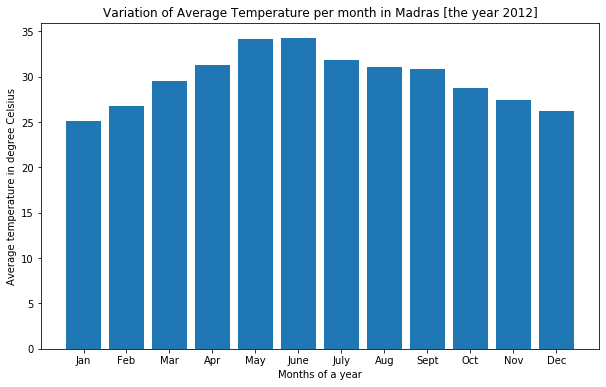

In [60]:
plt.rcParams['figure.figsize']=(10,6)
ax=plt.bar(['Jan','Feb',"Mar",'Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],temp_madras)
plt.title('Variation of Average Temperature per month in Madras [the year 2012]')
plt.xlabel('Months of a year')
plt.ylabel('Average temperature in degree Celsius')


In [61]:
nnormalised=df.loc[df['City']=='Madras']

In [62]:
p=nnormalised['AverageTemperature']
p=pd.DataFrame(p)

In [63]:
array=[]
normalised=(nnormalised['AverageTemperature']-nnormalised['AverageTemperature'].mean())/nnormalised['AverageTemperature'].std()
normalised=pd.DataFrame(normalised)

In [64]:
normalised.describe()

,AverageTemperature
count,2.613000e+03
mean,-1.122043e-14
std,1.000000e+00
min,-2.314805e+00
25%,-9.382324e-01
50%,8.550595e-02
75%,7.905046e-01
max,2.172523e+00


In [65]:
p=df['AverageTemperature']
p=pd.DataFrame(p)

In [66]:
dfnorm=(df['AverageTemperature']-df['AverageTemperature'].mean())/df['AverageTemperature'].std()
dfnorm=pd.DataFrame(dfnorm)
len(dfnorm)

239177

In [67]:
dfnorm.describe()

,AverageTemperature
count,2.391770e+05
mean,-2.941698e-14
std,1.000000e+00
min,-4.516195e+00
25%,-5.332133e-01
50%,2.317709e-01
75%,7.773987e-01
max,2.020787e+00


In [68]:
from scipy.stats import norm
def proplot(value):
    p =[]
    t =[]
    value.sort()
    p = [(i - 0.5)/len(value) for i in range(1, len(value)+1)]
    t = [norm.ppf(i, np.mean(value), np.std(value)) for i in p]
    plt.plot(value, t, 'ro', value, value)
    plt.title('quantile-quantile plot')
    plt.show()

In [69]:
arr=df['AverageTemperature'].sample(50).tolist()

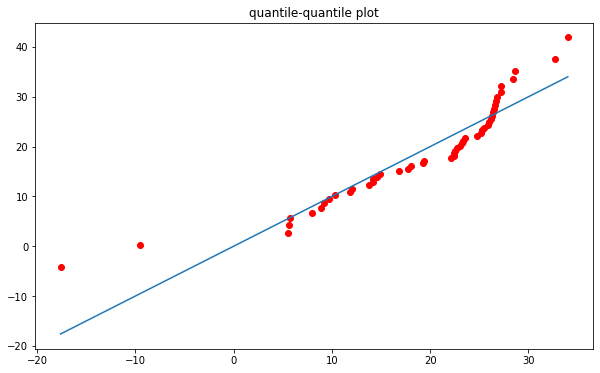

In [70]:
proplot(arr)

(array([ 1.,  1.,  0.,  0.,  4.,  6.,  8., 11., 17.,  2.]),
 array([-17.612 , -12.4503,  -7.2886,  -2.1269,   3.0348,   8.1965,
         13.3582,  18.5199,  23.6816,  28.8433,  34.005 ]),
 <a list of 10 Patch objects>)

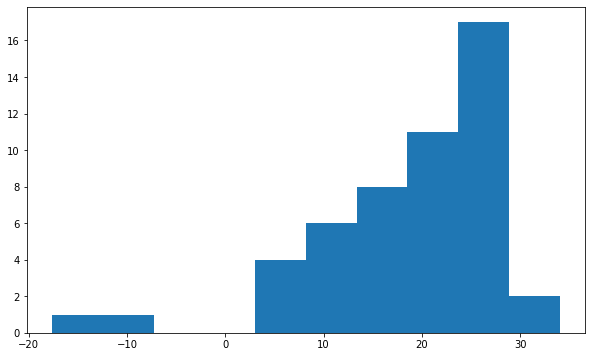

In [71]:
plt.hist(arr)

In [72]:
dfnorm2=(df['AverageTemperatureUncertainty']-df['AverageTemperatureUncertainty'].mean())/df['AverageTemperatureUncertainty'].std()
dfnorm2=pd.DataFrame(dfnorm2)
dfnorm2.describe()

,AverageTemperatureUncertainty
count,2.391770e+05
mean,-2.617343e-14
std,1.000000e+00
min,-9.865133e-01
25%,-6.718851e-01
50%,-3.847486e-01
75%,4.206590e-01
max,1.326543e+01


In [73]:
x=df['AverageTemperatureUncertainty']
x=pd.DataFrame(x)

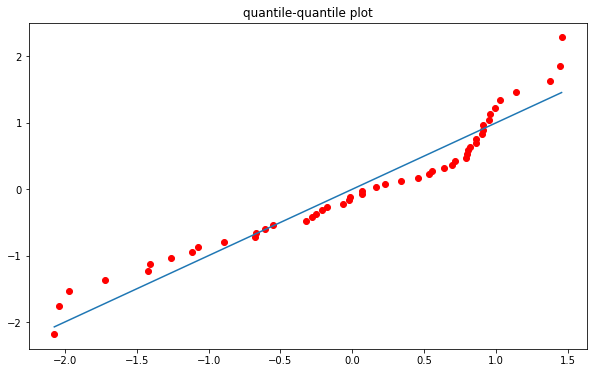

In [74]:
x=dfnorm['AverageTemperature'].sample(50).tolist()
proplot(x)
#from same normalised dataset

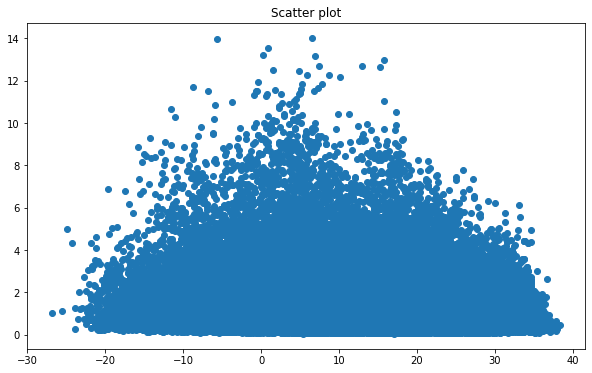

In [75]:
import matplotlib.pyplot as plt

plt.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'])
plt.title('Scatter plot')
plt.show()

In [76]:
uncer=[]
for i in range(len(df)):
    if df[params[3]][i]=='Bangalore':
        
        uncer.append(df[params[2]][i])

In [77]:
unc=uncer[1968:2568]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


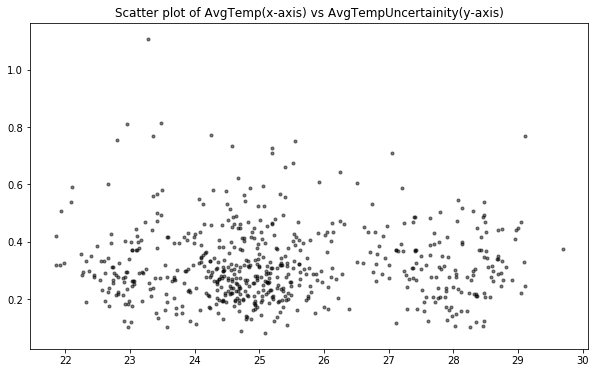

In [78]:
colors = (0,0,0)
area = np.pi*3
import matplotlib.pyplot as plts
# Plot
plts.scatter(average, unc, s=area, c=colors, alpha=0.5)
plts.title('Scatter plot of AvgTemp(x-axis) vs AvgTempUncertainity(y-axis)')

plts.show()

In [79]:
x=df['AverageTemperature'].tolist()

In [80]:
a=sorted(x)

In [81]:
q1,q3=np.percentile(x,[25,75])

In [82]:
q1

12.866

In [83]:
q3

25.909

In [84]:
IQR=q3-q1

In [85]:
IQR

13.043

In [86]:
lb=q1-1.5*IQR
ub=q3+1.5*IQR

In [87]:
new=[]
for j in x:
    if j>lb and j<ub:
        new.append(j)

In [88]:
new=pd.DataFrame(new)

In [89]:
c=new[0].sample(5).tolist()

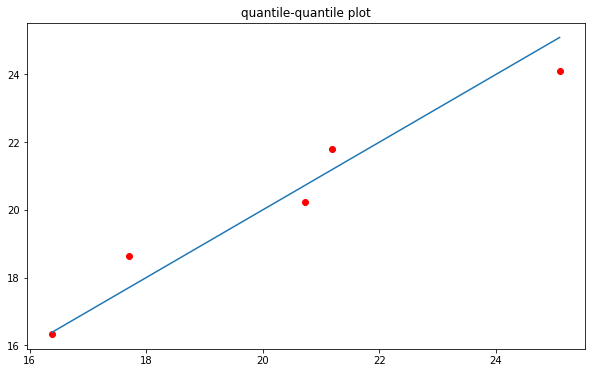

In [90]:
proplot(c)

In [91]:
nnorm=(new[0]-new[0].mean())/new[0].std()

In [92]:
nnorm=pd.DataFrame(nnorm)

In [93]:
afternorm=nnorm[0].sample(5).tolist()

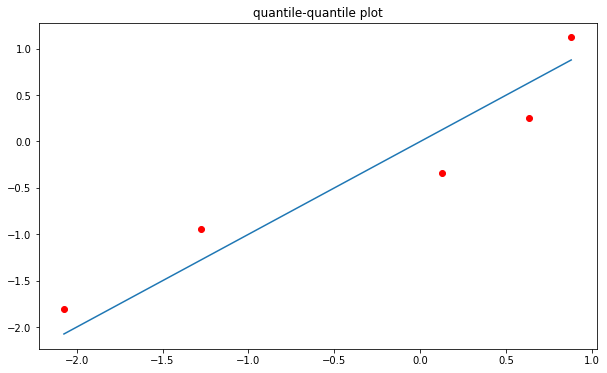

In [94]:
proplot(afternorm)